<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
# A:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [5]:
# A: 
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [6]:
boston = pd.concat([y, X], axis=1)
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [7]:
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [10]:
# A:

X = boston[['ZN','RM','CRIM']]
y = boston.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state = 1)
print(X_train.head())

       ZN     RM      CRIM
432   0.0  6.425   6.44405
403   0.0  5.349  24.80170
349  40.0  6.939   0.02899
433   0.0  6.436   5.58107
410   0.0  5.757  51.13580


In [16]:
# Check X's type.
print((type(X)))
print((type(X.values)))

# Check y's type.
print((type(y)))
print((type(y.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lr.predict(X)

array([25.93769013, 23.82412364, 29.55371879, 28.15022762, 29.259768  ,
       23.89107316, 21.40633962, 22.59416781, 18.52263077, 21.32878186,
       24.11429889, 21.3775726 , 20.4827261 , 20.15495433, 21.25561403,
       19.29302505, 19.95883897, 20.4292546 , 16.42056414, 18.4694413 ,
       17.17902891, 20.22719418, 21.47287303, 19.05797542, 19.94158115,
       17.48486068, 19.12597223, 20.81986633, 24.21889236, 25.51200247,
       18.27744201, 20.92164801, 19.99956607, 18.18295642, 21.04618849,
       20.15646648, 19.45936848, 19.53058016, 20.38012887, 29.10454404,
       32.32053394, 26.41992619, 21.90972758, 22.22086829, 21.16382202,
       18.25106078, 19.02736593, 20.84844672, 16.11099991, 17.64071678,
       21.48933734, 22.63900046, 25.60659071, 21.76017963, 23.80543668,
       34.80742955, 28.04625619, 32.08997914, 23.05215255, 21.42826195,
       20.02347096, 21.7060405 , 25.39397702, 27.68532652, 29.8755694 ,
       27.08048248, 23.30654398, 20.4079421 , 18.26141293, 20.44

In [18]:
y_pred = lr.predict(X_test)

In [15]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test, y_pred))

39.16511940551042


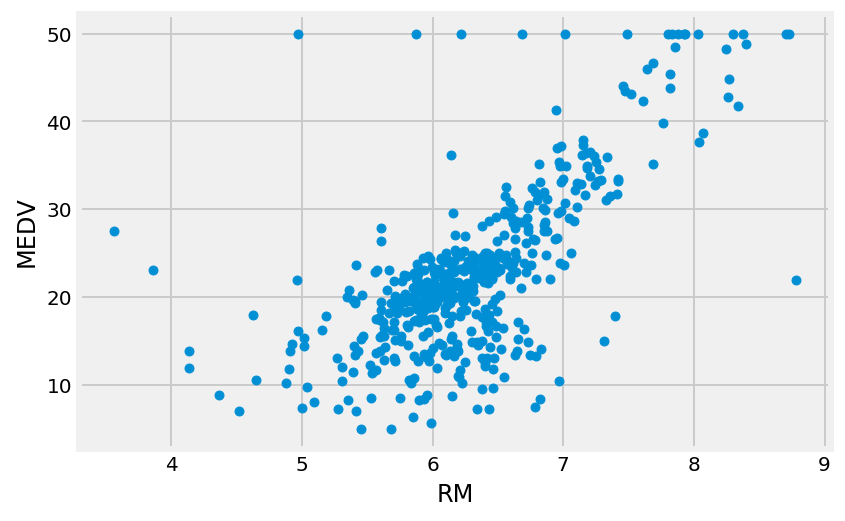

In [20]:
ax = boston.plot.scatter(x = 'RM', y ='MEDV')

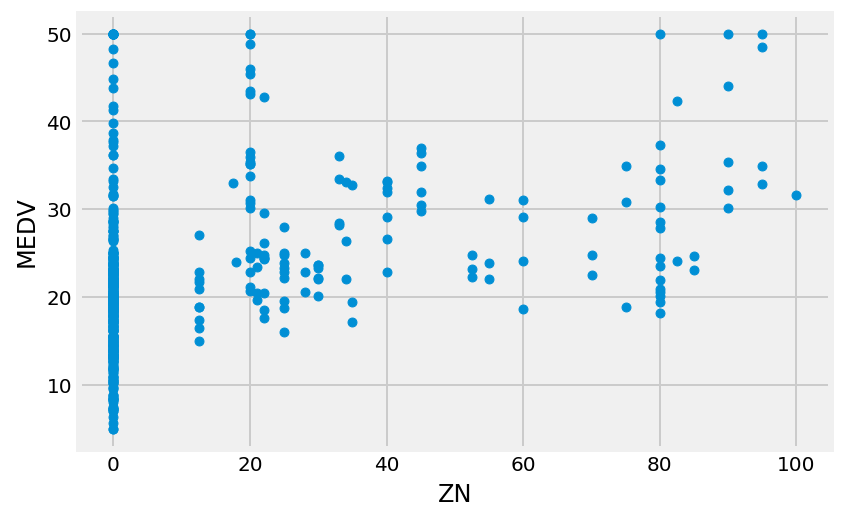

In [21]:
ax = boston.plot.scatter(x = 'ZN', y ='MEDV')

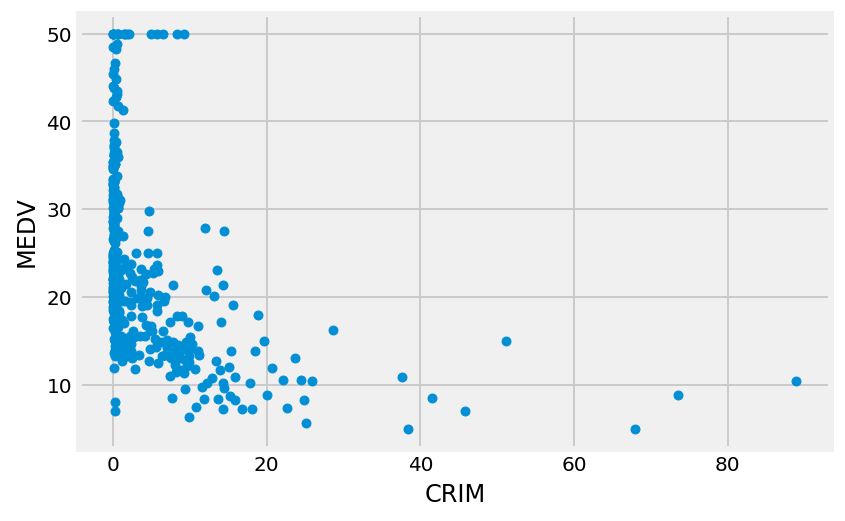

In [22]:
ax = boston.plot.scatter(x = 'CRIM', y ='MEDV')

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [23]:
# A: 70/30 split
X = boston[['ZN','RM','CRIM']]
y = boston.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))

31.933092070190686


In [24]:
X = boston[['ZN','RM','CRIM']]
y = boston.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 1)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred))

34.68557019900725


In [ ]:
#A: Above with 50/50 it was 39 and then for 70/30 is was lower at 31 and 90/10 was slightly between at 34

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [25]:
# A: 
from sklearn import model_selection

In [26]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [27]:

mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_indices], y.iloc[train_indices])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_indices], lr.predict(X.iloc[test_indices])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("------------------")
print('Mean  {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 36.372250255183125
R2: 0.5547051991418259

Model 2
MSE: 34.96126545971693
R2: 0.5532468394415073

Model 3
MSE: 49.04724003823052
R2: 0.5555096732246669

Model 4
MSE: 35.98686799898174
R2: 0.5549681153710885

Model 5
MSE: 35.070478522184246
R2: 0.5555732462569467

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 38.287620454859315
Mean of R2 for all folds: 0.5548006146872071


In [28]:
kf = model_selection.KFold(n_splits=6, shuffle=True)
mse_values = []
scores = []
n = 0

print("------")
for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_indices], y.iloc[train_indices])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_indices], lr.predict(X.iloc[test_indices])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("------")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 19.02607962649653
R2: 0.5545187174737534

Model 2
MSE: 51.93122207694709
R2: 0.554613034260764

Model 3
MSE: 64.61892262452895
R2: 0.5516784013504763

Model 4
MSE: 23.12063765534166
R2: 0.5549403111057242

Model 5
MSE: 38.30135630248244
R2: 0.5538677524274527

Model 6
MSE: 37.902994065109795
R2: 0.554716398885409

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 39.15020205848441
Mean of R2 for all folds: 0.5540557692505966


In [29]:
kf = model_selection.KFold(n_splits=7, shuffle=True)
mse_values = []
scores = []
n = 0

print("---")
for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_indices], y.iloc[train_indices])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_indices], lr.predict(X.iloc[test_indices])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 53.91466979993041
R2: 0.5547801366686038

Model 2
MSE: 47.469311869445974
R2: 0.5554421750729069

Model 3
MSE: 26.391041724833695
R2: 0.5557029991134349

Model 4
MSE: 46.11586285211278
R2: 0.5523760585013531

Model 5
MSE: 30.38106225629177
R2: 0.5557598906300854

Model 6
MSE: 22.666346511530566
R2: 0.5554672013081505

Model 7
MSE: 41.43873336908554
R2: 0.5549617376445992

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 38.33957548331868
Mean of R2 for all folds: 0.5549271712770192


In [30]:
kf = model_selection.KFold(n_splits=8, shuffle=True)
mse_values = []
scores = []
n = 0

print("----")
for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_indices], y.iloc[train_indices])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_indices], lr.predict(X.iloc[test_indices])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("-----")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 25.674621526065117
R2: 0.5551600497601352

Model 2
MSE: 42.96901000101205
R2: 0.5547322046681991

Model 3
MSE: 35.04538341217797
R2: 0.5557236122485385

Model 4
MSE: 28.0694741551077
R2: 0.5553986981964164

Model 5
MSE: 24.66133002045007
R2: 0.5557530953938169

Model 6
MSE: 46.21543913166492
R2: 0.5549995186538745

Model 7
MSE: 38.62400479678566
R2: 0.5554929313852528

Model 8
MSE: 66.49684550961292
R2: 0.5528586024218506

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 38.46951356910955
Mean of R2 for all folds: 0.5550148390910106


In [31]:
kf = model_selection.KFold(n_splits=9, shuffle=True)
mse_values = []
scores = []
n = 0

print("-----")
for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_indices], y.iloc[train_indices])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_indices], lr.predict(X.iloc[test_indices])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 17.372544995339492
R2: 0.5557556559039569

Model 2
MSE: 37.73059135248953
R2: 0.5555368277380746

Model 3
MSE: 58.33079106503684
R2: 0.5555842423139095

Model 4
MSE: 30.186207657914043
R2: 0.5555051096202688

Model 5
MSE: 51.91831626546108
R2: 0.5549572271763648

Model 6
MSE: 42.815649911211594
R2: 0.5553554121151256

Model 7
MSE: 26.005275941544628
R2: 0.5555456445127325

Model 8
MSE: 40.445933932826684
R2: 0.5532009524237663

Model 9
MSE: 41.49755047277687
R2: 0.5549831196866115

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 38.478095732733415
Mean of R2 for all folds: 0.555158243498979


In [32]:
kf = model_selection.KFold(n_splits=10, shuffle=True)
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_indices, test_indices in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_indices], y.iloc[train_indices])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_indices], lr.predict(X.iloc[test_indices])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 55.717487490573596
R2: 0.5550628013308374

Model 2
MSE: 35.82502190855576
R2: 0.5547206622426497

Model 3
MSE: 22.28799560274757
R2: 0.5552451420964426

Model 4
MSE: 34.13056498051314
R2: 0.5549824326791362

Model 5
MSE: 44.06250591471309
R2: 0.5550738936219233

Model 6
MSE: 20.884447870556013
R2: 0.5555127307155299

Model 7
MSE: 42.70131386167302
R2: 0.5555454974694354

Model 8
MSE: 67.13488099749469
R2: 0.5554998388774961

Model 9
MSE: 41.95523966968548
R2: 0.555770802312398

Model 10
MSE: 19.15976909112607
R2: 0.5555308882226707

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 38.385922738763846
Mean of R2 for all folds: 0.5552944689568519


In [ ]:
#A: All MSE MEans were very close and didnt seem to change much 

#5 - 38.287620454859315
#6 - 39.15020205848441
#7 - 38.33957548331868
#8 - 38.46951356910955
#9 - 38.478095732733415
#10 - - 38.385922738763846

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [8]:
# A:

### 5.1 Can you explain what could be wrong with this approach?

In [9]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [10]:
import patsy

# A: